In [11]:
# Importing necessary libraries for data manipulation, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [12]:
#LOADING DATA

df = pd.read_csv("C:/Users/Swati Padagatti/Downloads/archive (3)/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
#DATA CLEANING

# Remove empty spaces
df.columns = df.columns.str.strip()

# Replace blanks with NaN and drop them
df.replace(" ", np.nan, inplace=True)
df.dropna(inplace=True)

# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

# Drop customerID as it doesn’t add value
df.drop(['customerID'], axis=1, inplace=True)


In [14]:
#DATA PREPROCESSING

# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)

# Define X and y
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
#TRAIN THE MODEL

# Define input features (X) and target label (y)
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier instance
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [16]:
# Predict churn on the test data
y_pred = model.predict(X_test)


Accuracy: 0.7853589196872779

Classification Report:
               precision    recall  f1-score   support

       False       0.83      0.90      0.86      1033
        True       0.63      0.48      0.54       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



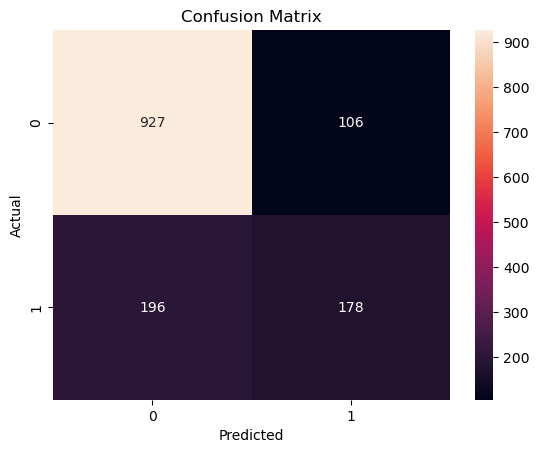

In [17]:
#EVALUATE THE MODEL

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


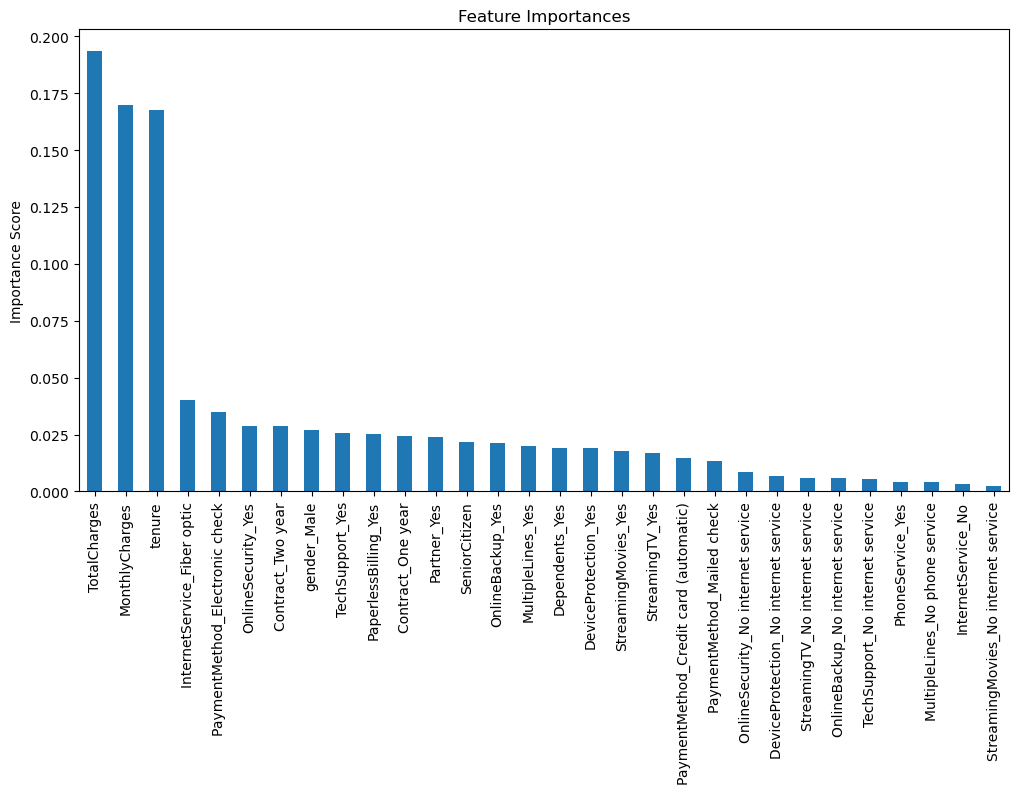

In [18]:
# Plot the importance of each feature
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(12,6), title='Feature Importances')
plt.ylabel("Importance Score")
plt.show()


# 📉 Churn Prediction Template

This template helps you analyze and predict customer churn using machine learning models. Designed for SaaS, telecom, or subscription-based businesses, this template is beginner-friendly and can be customized for any dataset.

---

## 📌 Objective

Predict whether a customer will **churn** (leave the service) using historical customer data. This can help businesses **reduce churn rate** by targeting at-risk customers with proactive actions.

---

## 📁 Dataset Used

- **Name**: Telco Customer Churn  
- **Source**: [Kaggle Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
- **Features**:
  - Demographics (gender, senior citizen)
  - Account information (tenure, contract, payment method)
  - Usage behavior (monthly charges, total charges)
  - Target: `Churn` (Yes/No)

---

## 🔧 Tools & Libraries

- Python  
- pandas, numpy  
- seaborn, matplotlib  
- scikit-learn (for ML)  
- Jupyter Notebook  

---

## 🔍 Steps Included

### 1. **Import Libraries**  
Import the necessary libraries for data processing, visualization, and modeling.

### 2. **Load Dataset**  
Load and display the dataset to understand its structure and contents.

### 3. **Data Cleaning**  
- Remove missing values  
- Convert `TotalCharges` to numeric  
- Drop unneeded columns like `customerID`  

### 4. **Exploratory Data Analysis (EDA)**  
- Understand distribution of target column (`Churn`)  
- Analyze correlations and relationships between features  

### 5. **Data Preprocessing**  
- Convert categorical variables using one-hot encoding  
- Split data into training and test sets  

### 6. **Model Training**  
Use `RandomForestClassifier` to build a classification model that predicts churn.

### 7. **Model Evaluation**  
- Evaluate the model using accuracy, confusion matrix, classification report  
- Visualize results for better interpretation  

---

## 📈 Example Output

- **Accuracy Score**: ~79–83%  
- **Top Features**:
  - MonthlyCharges
  - Contract type
  - Tenure  
- **Graphical Outputs**:
  - Confusion Matrix  
  - Churn vs Non-Churn distribution  

---

## 🧠 How to Use This Template

1. Upload your customer dataset (must contain a churn column).  
2. Clean and preprocess it using the given steps.  
3. Train a model using the template code.  
4. Analyze performance and tune as needed.  
5. Export predictions or integrate into business dashboards.  

---

## 💡 Use Cases

- Telecom churn reduction  
- SaaS subscription management  
- User retention strategies  
- Customer lifetime value prediction  

---

## 🚀 Future Improvements

- Add feature importance visualizations  
- Try other models (Logistic Regression, XGBoost)  
- Add hyperparameter tuning using GridSearchCV  
- Create an interactive dashboard (using Streamlit)  

---

## 📬 Contact

- **Creator**: Sukesh Padagatti  
- **Email**: sukeshpadagatti53@gmail.com  
- **Portfolio**: https://www.notion.so/Sukesh-Padagatti-AI-Data-Science-Portfolio-2398956fbd1980ef8ab5e0d114f05844?source=copy_link  
